# DEL 2 - Hälsostudie
 `I denna notebook använder jag HealthAnalyzer för analys av hälsostudiedata`

In [1]:
import sys
import os

# Lägg till projektets rotmapp i sökvägen
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)


In [2]:
import numpy as np
np.random.seed(42)

In [3]:
from src.data_loader import load_data
from src.analyzer import HealthAnalyzer


In [4]:
df = load_data('../data/health_study_dataset.csv')
healtanalyzer = HealthAnalyzer(df)


`Grundläggande statistik`

In [5]:
healtanalyzer.summary_status()

,id,age,height,weight,systolic_bp,cholesterol,disease
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,49.426250,171.849250,73.413000,149.178625,4.929150,0.058750
std,231.0844,14.501118,9.804259,13.685059,12.793360,0.848413,0.235303
min,1.0000,18.000000,144.400000,33.700000,106.800000,2.500000,0.000000
25%,200.7500,39.000000,164.775000,64.800000,140.900000,4.327500,0.000000
50%,400.5000,50.000000,171.350000,73.200000,149.400000,4.970000,0.000000
75%,600.2500,59.000000,178.925000,82.600000,157.600000,5.482500,0.000000
max,800.0000,90.000000,200.400000,114.400000,185.900000,7.880000,1.000000


`Scatterplot: ålder vs blodtryck`

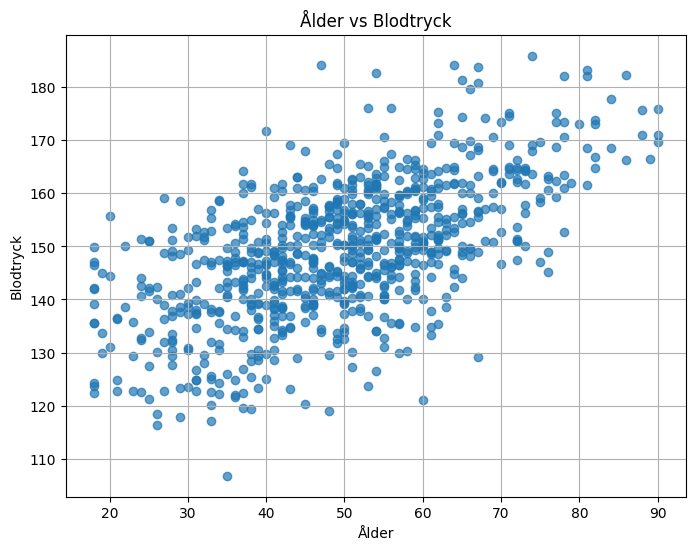

In [6]:
healtanalyzer.plot_age_vs_bp()

`Histogram för blodtryck`

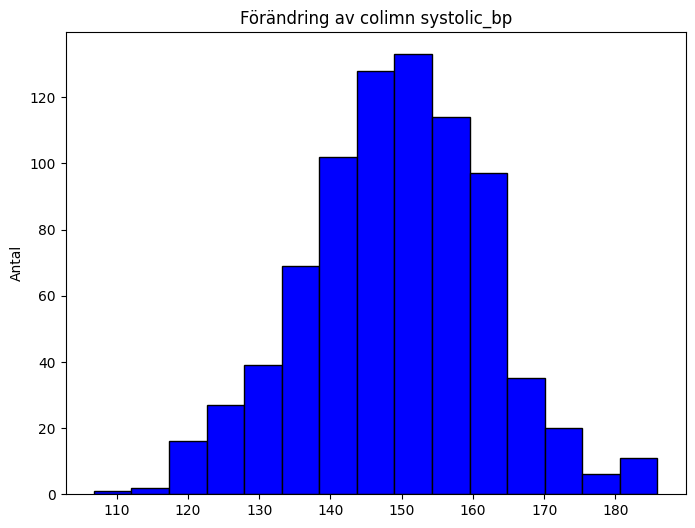

In [7]:
healtanalyzer.plot_histogram('systolic_bp', bins=15)

`Medelvärdet på blodtryck per kön`

In [8]:
healtanalyzer.group_mean('sex', 'systolic_bp')

sex
F    148.130025
M    150.243073
Name: systolic_bp, dtype: float64

`Linjär Regression: Blodtryck ~ Ålder`

In [9]:
model, coef, intercept = healtanalyzer.liner_regression('age', 'systolic_bp')
print(f"Coefficient = {coef:.2f} * Ålder + Intercept: {intercept:.2f}")
print(f'Regressionen säger att blodtrycket ökar med {coef:.2f} per år i ålder.')

Coefficient = 0.54 * Ålder + Intercept: 122.68
Regressionen säger att blodtrycket ökar med 0.54 per år i ålder.


`PCA-analys`

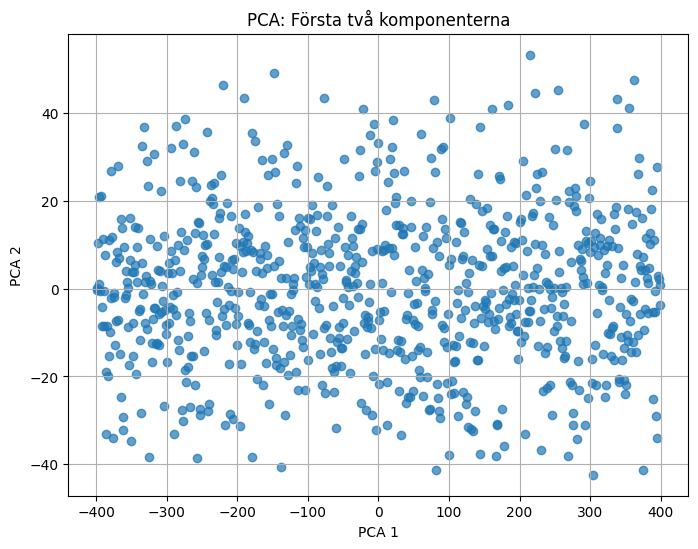

Förklarad varians för varje komponent: [0.9878352  0.00565447]


In [10]:
components, explained_var = healtanalyzer.pca_analysis()
print(f'Förklarad varians för varje komponent: {explained_var}')